Epoch 1/2
469/469 [==============================] - 57s 119ms/step - loss: 0.5967 - accuracy: 0.7898 - val_loss: 0.4285 - val_accuracy: 0.8490
Epoch 2/2
313/313 [==============================] - 4s 13ms/step - loss: 0.3717 - accuracy: 0.8695
Test accuracy: 0.8694999814033508
313/313 [==============================] - 3s 10ms/step


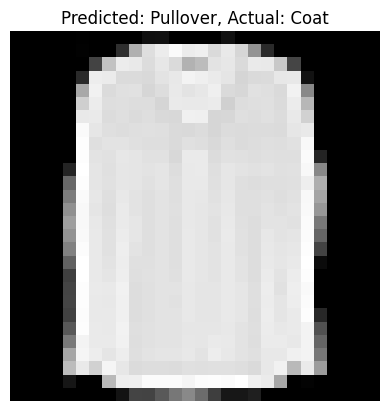

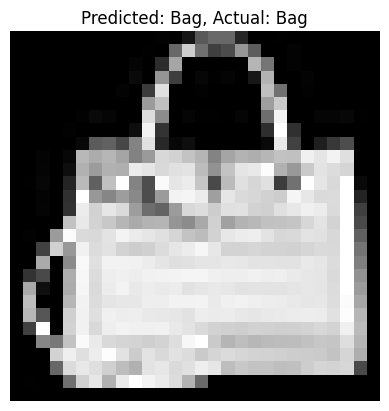

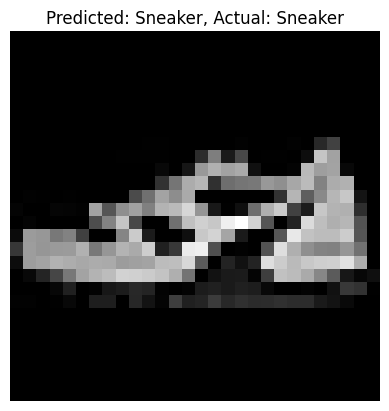

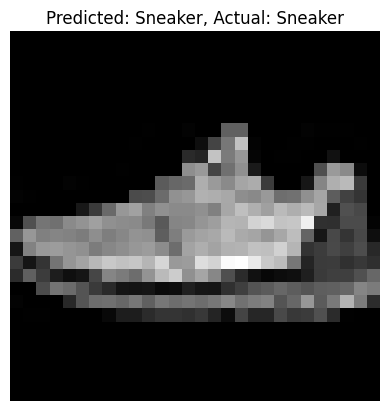

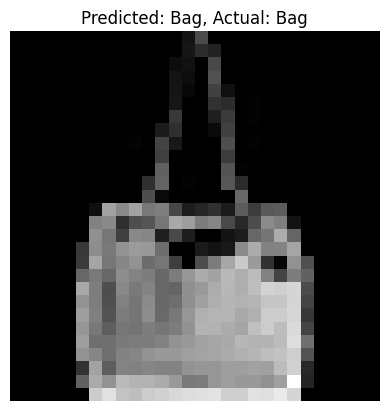

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Load the MNIST Fashion Dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Visualize some predictions
predictions = model.predict(X_test)
num_samples = 5
indices = np.random.choice(range(len(X_test)), num_samples, replace=False)

for i in indices:
    prediction = np.argmax(predictions[i])
    actual_label = y_test[i]
    image = X_test[i].reshape(28, 28)
    
    plt.imshow(image, cmap='gray')
    plt.title(f'Predicted: {class_names[prediction]}, Actual: {class_names[actual_label]}')
    plt.axis('off')
    plt.show()
